### Importação dos dados



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento

C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\3722223841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_total.index, y=faturamento_total.values, palette='coolwarm')


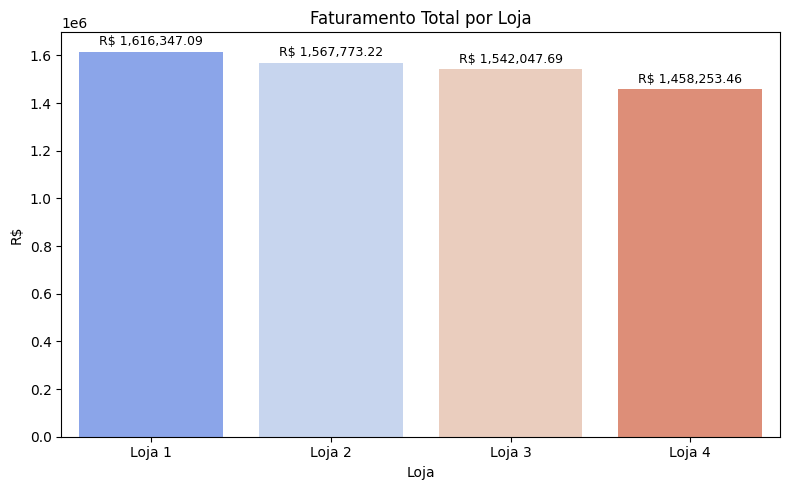

In [27]:
df['Faturamento'] = df['Preço'] + df['Frete']
faturamento_total = df.groupby('Loja')['Faturamento'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=faturamento_total.index, y=faturamento_total.values, palette='coolwarm')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.xlabel('Loja')

for i, valor in enumerate(faturamento_total.values):
    ax.text(i, valor + (valor * 0.01), f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\3718771778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categoria.index, y=categoria.values, palette='coolwarm')


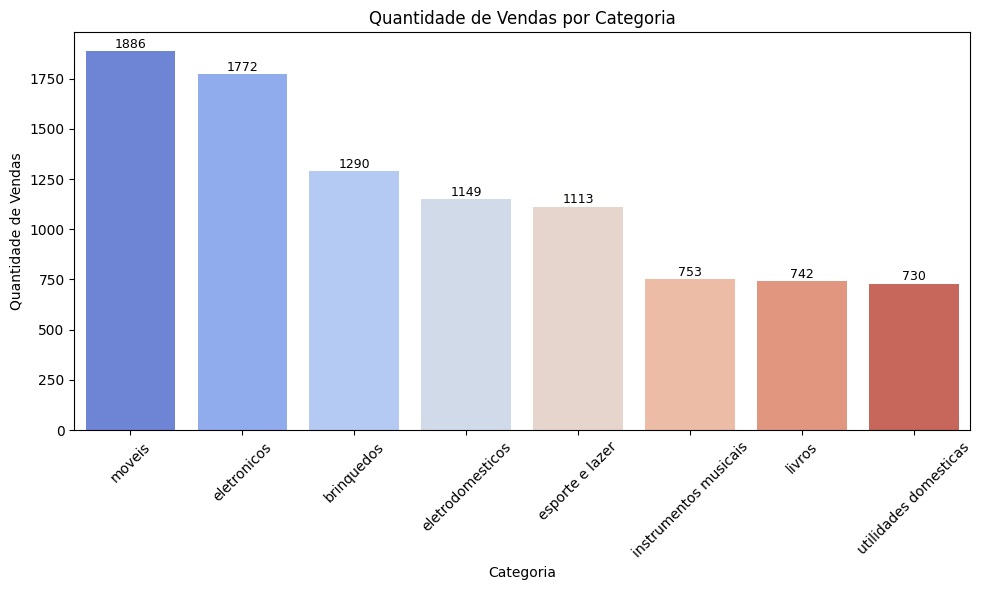

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=categoria.index, y=categoria.values, palette='coolwarm')
plt.title('Quantidade de Vendas por Categoria')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Categoria')

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1, f'{int(altura)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\300476374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avaliacao_media.index, y=avaliacao_media.values, palette='coolwarm')


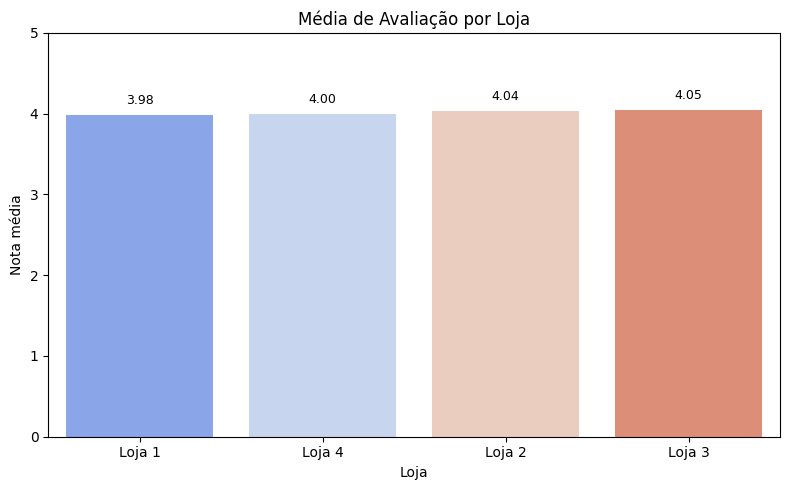

In [32]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=avaliacao_media.index, y=avaliacao_media.values, palette='coolwarm')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota média')
plt.xlabel('Loja')
plt.ylim(0, 5)

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 0.1, f'{altura:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\3103253015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mais_vendidos.values, y=mais_vendidos.index, palette="Greens_r")


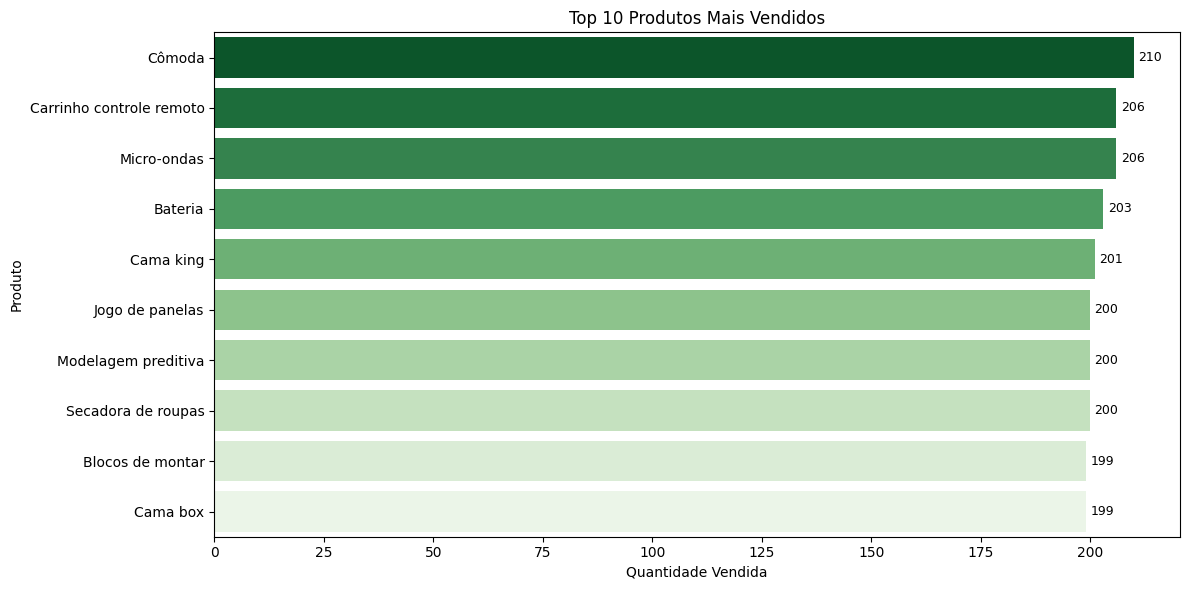

C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\3103253015.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=menos_vendidos.values, y=menos_vendidos.index, palette="Reds_r")


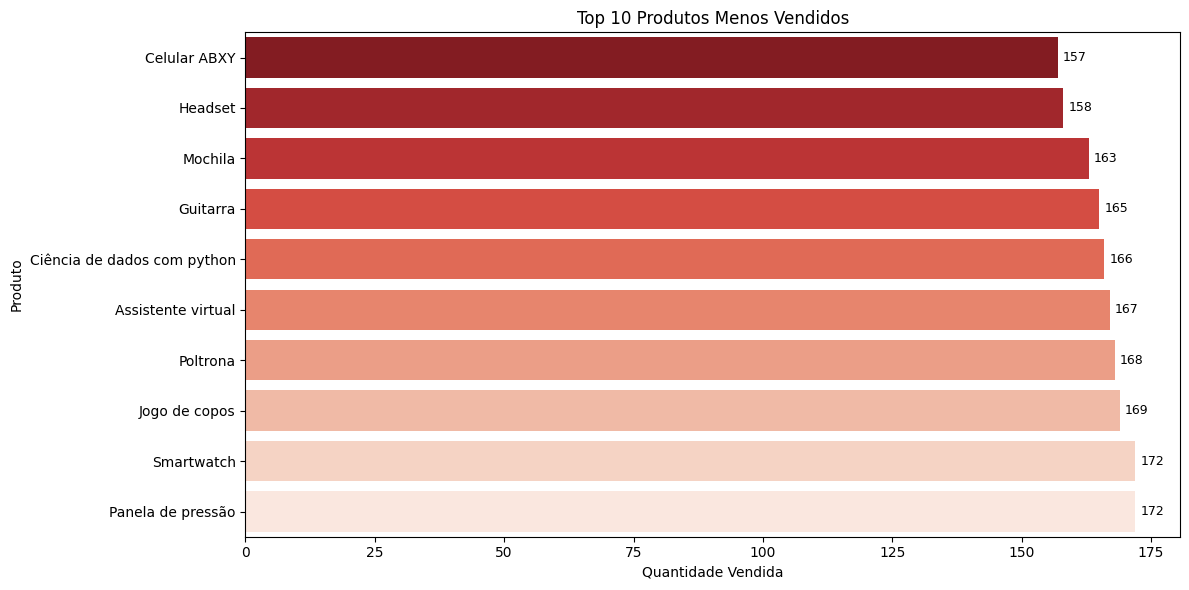

In [33]:
mais_vendidos = df.groupby("Produto")["Produto"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=mais_vendidos.values, y=mais_vendidos.index, palette="Greens_r")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")

for p in ax.patches:
    largura = p.get_width()
    ax.text(largura + 1, p.get_y() + p.get_height() / 2, f'{int(largura)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

menos_vendidos = df.groupby("Produto")["Produto"].count().sort_values(ascending=True).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=menos_vendidos.values, y=menos_vendidos.index, palette="Reds_r")
plt.title("Top 10 Produtos Menos Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")

for p in ax.patches:
    largura = p.get_width()
    ax.text(largura + 1, p.get_y() + p.get_height() / 2, f'{int(largura)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\243208643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frete_medio.index, y=frete_medio.values, palette='coolwarm')


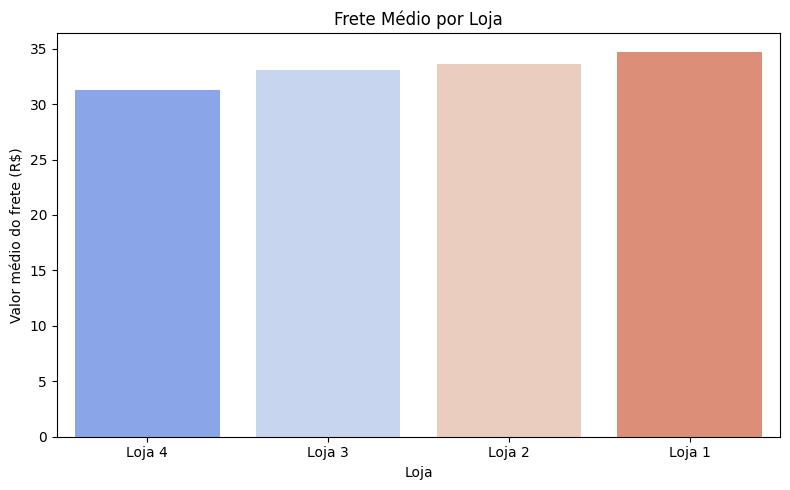

In [24]:
frete_medio = df.groupby('Loja')['Frete'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=frete_medio.index, y=frete_medio.values, palette='coolwarm')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()

C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\334744729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_total.index, y=faturamento_total.values, ax=axs[0,0], palette='coolwarm')
C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\334744729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacao_media.index, y=avaliacao_media.values, ax=axs[0,1], palette='coolwarm')
C:\Users\andressa\AppData\Local\Temp\ipykernel_32172\334744729.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frete_medio.index, y=frete

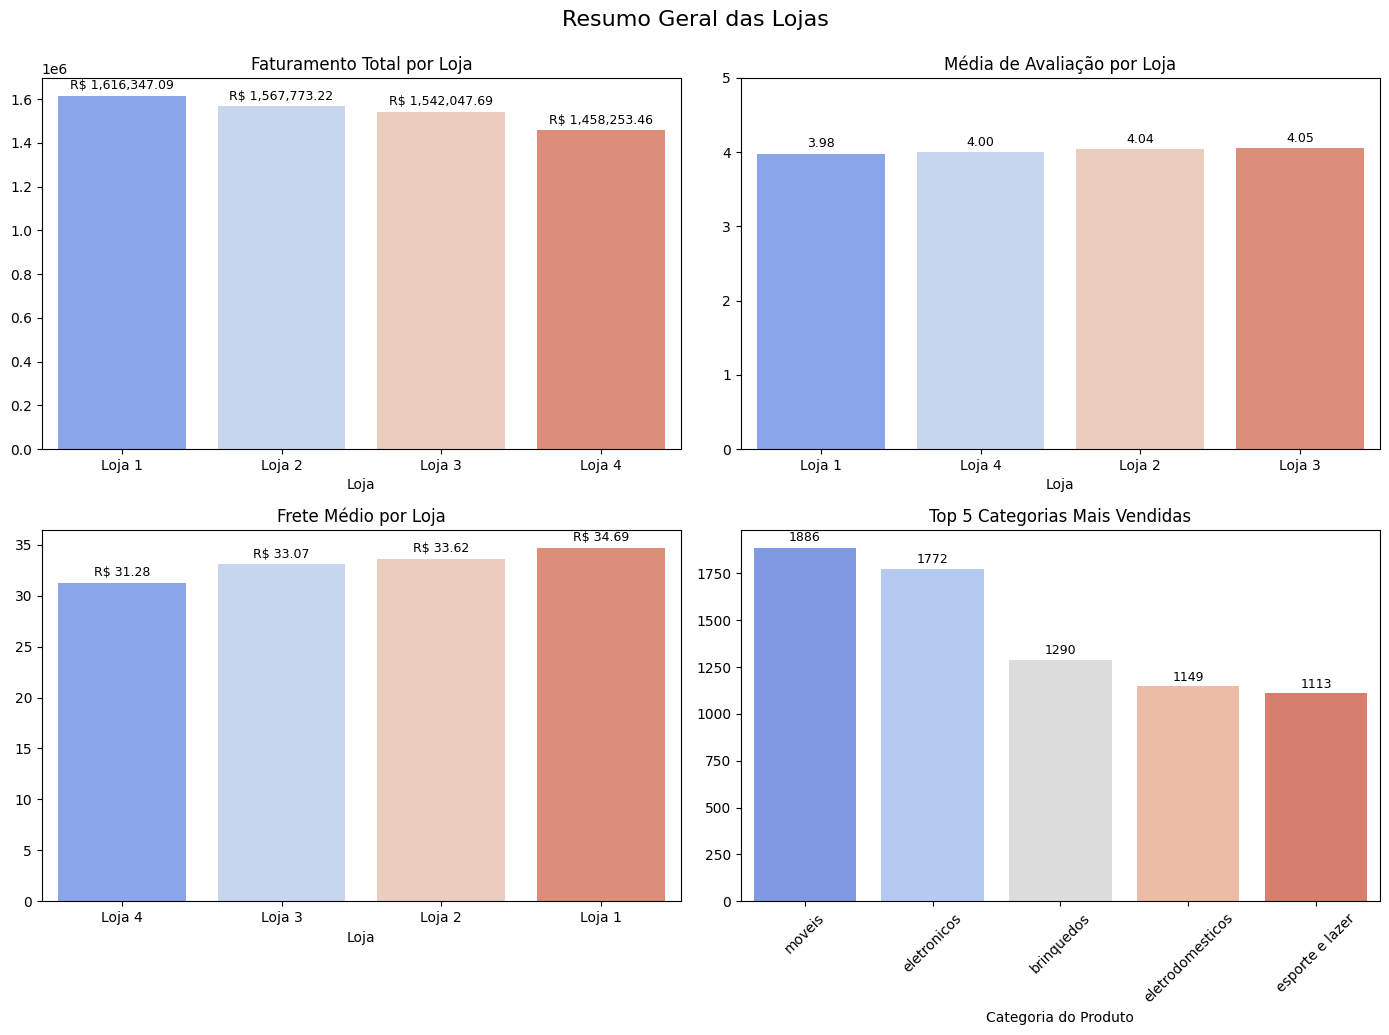

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x=faturamento_total.index, y=faturamento_total.values, ax=axs[0,0], palette='coolwarm')
axs[0,0].set_title('Faturamento Total por Loja')
for p in axs[0,0].patches:
    altura = p.get_height()
    axs[0,0].text(p.get_x() + p.get_width()/2, altura + (altura * 0.01), f'R$ {altura:,.2f}', ha='center', va='bottom', fontsize=9)

sns.barplot(x=avaliacao_media.index, y=avaliacao_media.values, ax=axs[0,1], palette='coolwarm')
axs[0,1].set_title('Média de Avaliação por Loja')
axs[0,1].set_ylim(0,5)
for p in axs[0,1].patches:
    altura = p.get_height()
    axs[0,1].text(p.get_x() + p.get_width()/2, altura + 0.05, f'{altura:.2f}', ha='center', va='bottom', fontsize=9)

sns.barplot(x=frete_medio.index, y=frete_medio.values, ax=axs[1,0], palette='coolwarm')
axs[1,0].set_title('Frete Médio por Loja')
for p in axs[1,0].patches:
    altura = p.get_height()
    axs[1,0].text(p.get_x() + p.get_width()/2, altura + (altura * 0.01), f'R$ {altura:,.2f}', ha='center', va='bottom', fontsize=9)

sns.barplot(x=categoria.index[:5], y=categoria.values[:5], ax=axs[1,1], palette='coolwarm')
axs[1,1].set_title('Top 5 Categorias Mais Vendidas')
axs[1,1].tick_params(axis='x', rotation=45)
for p in axs[1,1].patches:
    altura = p.get_height()
    axs[1,1].text(p.get_x() + p.get_width()/2, altura + (altura * 0.01), f'{int(altura)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Resumo Geral das Lojas', fontsize=16, y=1.03)
plt.show()


In [ ]:
## 🏁 Conclusão

A **Loja 4** é a melhor opção para ser vendida.

Apesar do frete mais barato, ela tem o menor faturamento entre as lojas, indicando baixo desempenho financeiro.

A avaliação dos clientes também é baixa, com muitos dando notas entre 1 e 3.

A loja se destaca apenas em duas categorias, sendo que uma delas tem poucas vendas no geral.

Por esses motivos, recomendamos que o Sr. João venda a Loja 4 para investir em negócios com maior potencial.